In [1]:
import pandas as pd
df = pd.read_csv("/Users/mms/OneDrive - Jihočeská univerzita v Českých Budějovicích/Projects/WORLDSOILS/data/lucas15/S2a_lucas15_merged.csv")

print(df)


            ID  index  sample.ID        split  fold    OC   B_442.7   B_492.4  \
0     55802362      1   55802362  calibration     1  11.5  0.386902  0.401339   
1     51884268      2   51884268  calibration     1  16.8  0.480639  0.503182   
2     37042680      3   37042680  calibration     1  13.9  0.361354  0.378062   
3     28601668      4   28601668  calibration     1  10.5  0.400529  0.410930   
4     35083176      5   35083176  calibration     1  33.7  0.402473  0.417575   
...        ...    ...        ...          ...   ...   ...       ...       ...   
8911  64601644   8937   64601644         test    -1  11.8  0.475019  0.497026   
8912  64641640   8938   64641640         test    -1  13.5  0.417248  0.435323   
8913  64661656   8939   64661656         test    -1   3.1  0.507384  0.531391   
8914  64801668   8940   64801668         test    -1   8.9  0.317341  0.309569   
8915  64841670   8941   64841670         test    -1  11.2  0.310982  0.301547   

       B_559.8   B_664.6   

In [3]:
from sklearn import preprocessing

new_df = df.apply(lambda x: preprocessing.robust_scale(x) if x.name == 'OC' else x)
print(new_df)


            ID  index  sample.ID        split  fold    OC   B_442.7   B_492.4  \
0     55802362      1   55802362  calibration     1 -0.28  0.386902  0.401339   
1     51884268      2   51884268  calibration     1  0.25  0.480639  0.503182   
2     37042680      3   37042680  calibration     1 -0.04  0.361354  0.378062   
3     28601668      4   28601668  calibration     1 -0.38  0.400529  0.410930   
4     35083176      5   35083176  calibration     1  1.94  0.402473  0.417575   
...        ...    ...        ...          ...   ...   ...       ...       ...   
8911  64601644   8937   64601644         test    -1 -0.25  0.475019  0.497026   
8912  64641640   8938   64641640         test    -1 -0.08  0.417248  0.435323   
8913  64661656   8939   64661656         test    -1 -1.12  0.507384  0.531391   
8914  64801668   8940   64801668         test    -1 -0.54  0.317341  0.309569   
8915  64841670   8941   64841670         test    -1 -0.31  0.310982  0.301547   

       B_559.8   B_664.6   

In [22]:
y = df.iloc[:, 5]

print(y)

0       11.5
1       16.8
2       13.9
3       10.5
4       33.7
        ... 
8911    11.8
8912    13.5
8913     3.1
8914     8.9
8915    11.2
Name: OC, Length: 8916, dtype: float64


In [15]:
from fnn_v2 import separating_data_set
(cal_df, tst_df) = separating_data_set(df)

print(cal_df, tst_df)



                   ID  index  sample.ID  fold    OC   B_442.7   B_492.4  \
split                                                                     
calibration  55802362      1   55802362     1  11.5  0.386902  0.401339   
calibration  51884268      2   51884268     1  16.8  0.480639  0.503182   
calibration  37042680      3   37042680     1  13.9  0.361354  0.378062   
calibration  28601668      4   28601668     1  10.5  0.400529  0.410930   
calibration  35083176      5   35083176     1  33.7  0.402473  0.417575   
...               ...    ...        ...   ...   ...       ...       ...   
calibration  49863190   5957   49863190     5   7.1  0.419056  0.433878   
calibration  53982496   5958   53982496     5  12.3  0.412170  0.432017   
calibration  49503250   5959   49503250     5  15.6  0.350815  0.357755   
calibration  40143344   5960   40143344     5   9.2  0.435503  0.460149   
calibration  41162430   5961   41162430     5  10.2  0.432687  0.460069   

              B_559.8   

In [16]:
from fnn_v2 import splitting_dataset


(x_train, y_train) = splitting_dataset(cal_df)
(x_test, y_test) = splitting_dataset(tst_df)


In [18]:
print(x_train.iloc[:,:])

              B_442.7   B_492.4   B_559.8   B_664.6   B_704.1   B_740.5  \
split                                                                     
calibration  0.386902  0.401339  0.461092  0.525561  0.544394  0.561561   
calibration  0.480639  0.503182  0.548479  0.581449  0.589048  0.596399   
calibration  0.361354  0.378062  0.454961  0.538700  0.560565  0.579131   
calibration  0.400529  0.410930  0.452804  0.503406  0.522025  0.539770   
calibration  0.402473  0.417575  0.480054  0.553105  0.574502  0.592494   
...               ...       ...       ...       ...       ...       ...   
calibration  0.419056  0.433878  0.473898  0.527271  0.545921  0.561128   
calibration  0.412170  0.432017  0.492896  0.563822  0.587100  0.606933   
calibration  0.350815  0.357755  0.384411  0.426981  0.444190  0.460264   
calibration  0.435503  0.460149  0.505087  0.549494  0.566399  0.580696   
calibration  0.432687  0.460069  0.545049  0.626251  0.647001  0.664687   

              B_782.8   

In [20]:
indexNamesArr = x_train.index.values
print(indexNamesArr)

['calibration' 'calibration' 'calibration' ... 'calibration' 'calibration'
 'calibration']


<class 'numpy.ndarray'>
RobustScaler Data =  [-0.28  0.25 -0.04 ... -1.12 -0.54 -0.31]
(8916,)


/Users/mms/anaconda3/envs/WORLDSOILS/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mms/anaconda3/envs/WORLDSOILS/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


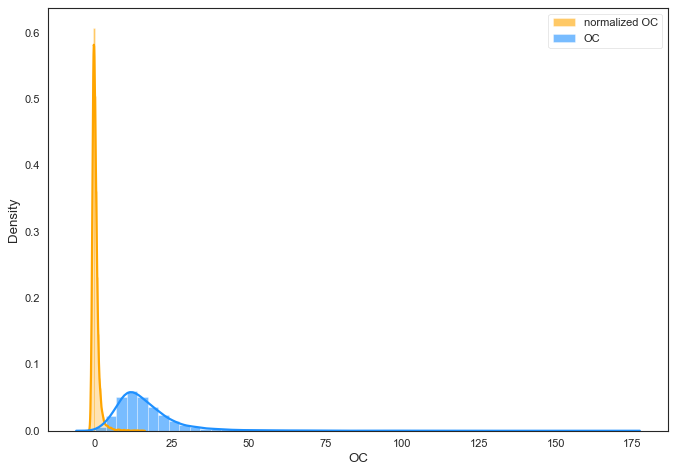

In [27]:
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Robust Scaling the data attributes
RobustScaler_y = preprocessing.robust_scale(y)
print(type(RobustScaler_y))
print("RobustScaler Data = ", RobustScaler_y)

print(RobustScaler_y.shape)
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(RobustScaler_y, color="orange", label="normalized OC", **kwargs)
sns.distplot(y, color="dodgerblue", label="OC", **kwargs)
#plt.xlim(50,75)
plt.legend();



